# Discrete Fourier Transforms
Notes: Audio Signal Processing, Coursera Class, Week 2

Date: 20170404


In [2]:
import scipy as sp
from scipy import cos as cos
from scipy import sin as sin
from scipy import pi as pi
from scipy import exp as exp

import matplotlib.pyplot as plt

%matplotlib inline

## Discrete Fourier Transform Equation

Basic discrete fourier transformation (DFT) from a function with a discrete time index to a function with a discrete frequency index

$ X[k] = \sum\limits_{n=0}^{N-1} {x[n]e^{-j 2 \pi k n / N}} \quad k=0,...,N-1. $

Where
* $n$: discrete time index (normalized time, T=1),
* $k$: discrete frequency index,
* $\omega_k = 2 \pi k / N$: frequency in radians,
* $f_k = f_s k / N$: frequency in Hz ($f_s$: sampling rate).



## DFT Example: Complex Exponentials
The complex exponential can be expressed as

$\begin{align}
s^*_k &= e^{-j 2 \pi k n / N} \\
&= \cos(2 \pi k n / N) - j \sin(2 \pi k n / N).
\end{align}$

If $N=4$, then $n=0,1,2,3$ and $k=0,1,2,3$.

$\begin{align}
&s^*_0=\cos(2\pi*0*n/4)-j\sin(2\pi*0*n/4)=[1,1,1,1]\\
&s^*_1=\cos(2\pi*1*n/4)-j\sin(2\pi*1*n/4)=[1,-j,-1,j]\\
&s^*_2=\cos(2\pi*2*n/4)-j\sin(2\pi*2*n/4)=[1,-1,1,-1]\\
&s^*_3=\cos(2\pi*3*n/4)-j\sin(2\pi*3*n/4)=[1,j,-1,-j]
\end{align}$

In [3]:
def dft_ce(N):
    '''
    Given the number of samples N, compute the complex exponential result.
    
    Expressing the equation as 
    
    $$s^*_k = \exp^{-j 2 \pi k n / N} = 
    \cos(2 \pi k n / N) - j \sin(2 \pi k n / N).$$
    
    Compute the result s[k,n] and return the results in an N x N array
    of the form [s[k,0]; s[k,1]; ... ].
    '''
    
    # Initialize variables
    s = sp.zeros([N,N], complex)
    
    for n in range(N):
        for k in range(N):
            s[k,n] = cos(2*pi*k*n/N) - 1j*sin(2*pi*k*n/N)
    
    return(s)

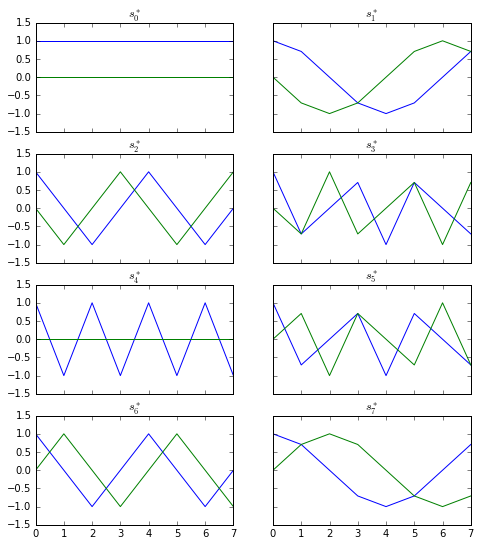

In [4]:
# Plot the results of the complex exponentials example

N = 8
s = dft_ce(N)

f, ax = plt.subplots(nrows=4, ncols=2, sharex=True, sharey=True, figsize=(7.8, 9))
for i in range(4):
    for j in range(2):
        ax[i,j].plot(sp.real(s[2*i + j]), 'b')
        ax[i,j].plot(sp.imag(s[2*i + j]), 'g')
        ax[i,j].set_title(r"$s_{:1}^*$" .format(2*i+j))
plt.ylim([-1.5,1.5])
plt.show()

In [5]:
def dft_sp(x):
    '''
    Discrete Fourier Transform: Scalar Product
    
    Input an array with a discrete time index.
    
    Outputs the transform of the array with a discrete frequency index.
    '''
    
    N = len(x)
    
    s = dft_ce(N)
    
    X = sp.dot(x, s)
    
    return(X)
    

In [6]:
dft_sp([1,2,3,4])

array([ 10. +0.00000000e+00j,  -2. +2.00000000e+00j,  -2. -9.79717439e-16j,
        -2. -2.00000000e+00j])

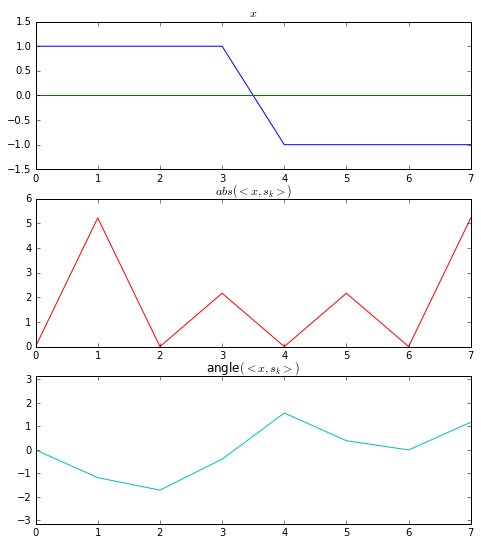

In [7]:
def dft_plot(x):
    '''
    Given a 1D array with a discrete time index, plot the input signal and the discrete fourier
    transform amplitude and angle.
    '''
    
    X = dft_sp(x)

    f, ax = plt.subplots(3, figsize=(7.8, 9))

    ax[0].plot(sp.real(x), 'b')
    ax[0].plot(sp.imag(x), 'g')
    ax[0].set_title(r"$x$")
    ax[0].set_ylim([-1.5, 1.5])

    ax[1].plot(abs(X), 'r')
    ax[1].set_title(r"$abs(<x, s_k>)$")

    ax[2].plot(sp.angle(X), 'c')
    ax[2].set_title(r"angle$(<x, s_k>)$")
    ax[2].set_ylim([-2, 2])
    ax[2].set_ylim([-pi, pi])

    plt.show()
    
x = [1, 1, 1, 1, -1, -1, -1, -1]

dft_plot(x)


## DFT Examples

Plotting
1. a complex sinusoid where $x_1[n] = e^{j 2 \pi k_0 n / N}$, for $n=0,...,N-1$,
2. any complex sinusoid where $x_2[n] = e^{j(2 \pi k_0 n + \omega)}$, for $n=0,...,N-1$,
3. real sinusoids where $x_3[n] = \frac{A_0}{2} e^{j 2 \pi k_0 n/N} + \frac{A_0}{2} e^{-j 2 \pi k_0 n/N}$, for $n=0,...,N-1$.



In [8]:
N = 64
k0 = 7.5
f0 = 7.5
w = 25*pi/180
A0 = 1

x1 = sp.zeros(N, complex)
x2 = sp.zeros(N, complex)
x3 = sp.zeros(N, complex)

for n in range(N):
    x1[n] = exp(1j*2*pi*k0*n/N)
    x2[n] = exp(1j*(2*pi*f0*n/N+w))
    x3[n] = (A0/2)*exp(1j*2*pi*k0*n/N) + (A0/2)*exp(-1j*2*pi*k0*n/N)


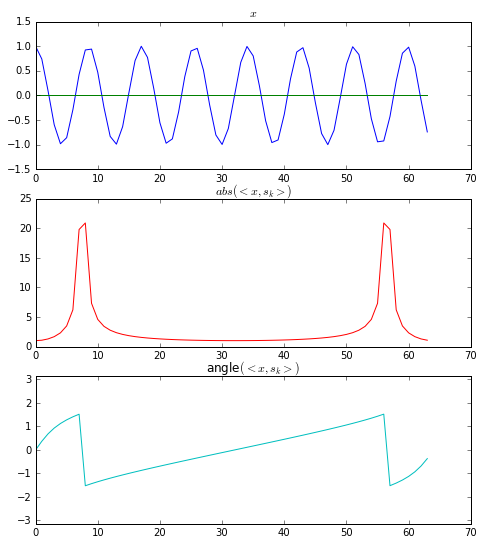

In [9]:
dft_plot(x3)

In [10]:
x1=sp.zeros(5, complex)
x1[0] = exp(1j*2*pi*k0*0/N)
x1[1] = exp(1j*2*pi*k0*1/N)
x1[2] = exp(1j*2*pi*k0*2/N)
x1[3] = exp(1j*2*pi*k0*3/N)
x1[4] = exp(1j*2*pi*k0*4/N)

In [13]:
import os
import sys
sys.path.append('C:/work/python/sigproc/asp/workspace/A2/')


In [14]:
from A2Part1 import genSine

# Input
A = 1.0
f = 10.0
phi = 1.0
fs = 50.0
t = 0.1

T = 1/fs
N = int(sp.floor(fs*t))

x = sp.zeros(N)

# EQN 1
for n in range(N):
    x[n] = A*sp.cos(2*sp.pi*f*n*T + phi)

genSine(A, f, phi, fs, t)

ImportError: No module named 'A2Part1'

In [ ]:
from A2Part2 import genComplexSine

#Input
N = 5
k = 1

A = 1.0
phi = 0.0

w = 2.*sp.pi*k/N
T = 1./k

cSine = sp.zeros(N, complex)

for n in range(N):
    cSine[n] = A*exp(-1.j*(w*n+phi))
    
print(cSine)    

print(genComplexSine(k, N))

In [ ]:
cSine

In [ ]:
from A2Part3 import DFT

DFT([1,2,3,4])

In [ ]:
sys.path.append('C:/work/python/sigproc/asp/workspace/A2/')
from A2Part4 import IDFT

print(IDFT([1,1,1,1]))

print(IDFT(DFT([1,2,3,4])))

In [ ]:
import numpy as np

X = [1,1,1,1]

N = len(X)

s = np.zeros([N,N], complex)

for n in range(N):
    for k in range(N):
        s[k,n] = (1./N)*np.exp(1.j*2.*np.pi*k*n/N)

x = np.dot(X, s)

x

In [ ]:
A = 0.8
f0 = 1000
phi = sp.pi/2
fs = 44100
t = sp.arange(-0.002, 0.002, 1.0/fs)
x = A * cos(2*sp.pi*f0*t*phi)

plt.plot(t, x)